In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


### 1. How many unique products are there in the dataset? (5 marks)
You need to find product ID of each product from product_link and then find the number of unique product ids

- Finding Unique Products as per their Product ID
- Removing Products with Duplicate Product ID

In [2]:
df['product_id'] = [int(product_link.split('/')[-2]) for product_link in df['product_link']]

# Removing Products with Duplicate Product ID
df = df.drop_duplicates(subset=['product_id'])

df.head()
len(df)

146435

### 2. What is the average rating of the products? (2 mark)
- Try it without the product that are having rating 0
- Try it without the product that are having 0 people given any rating

Try it without the product that are having rating 

In [4]:
print(df['rating'].mean())

2.3158240857718444


Try it without the product that are having 0 people given any rating

In [6]:
print(df[df['rating'] != 0.0]['rating'].mean()) 

4.1678571867510605


### 3. What is the average discount percentage of the products? (1 mark)

In [12]:
avg= df['discount_percent'].mean()

In [13]:
avg

37.15093386144023

### 4. What are the top 5 most expensive products? (2 marks)
- Make sure that there can be multiple brands with same name so you can take brand ID also into considration

In [14]:
df.groupby('product_name').mean()['discounted_price'].sort_values(ascending = False).head()

C:\Users\RAJ\AppData\Local\Temp\ipykernel_18036\1845910256.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('product_name').mean()['discounted_price'].sort_values(ascending = False).head()


product_name
Lord Krishna Showpiece              45599.0
Airwrap Complete Hair Styler        44900.0
Mid-Rise Stretchable Jeans          41000.0
Printed Carpets                     40350.0
Men Brass Dial & Automatic Watch    40050.0
Name: discounted_price, dtype: float64

### 5. What are the top 10 brands by the number of products in the dataset? (2 mark)

<Axes: title={'center': ' TOP 10 Brands by no. of products'}, xlabel='brand_name'>

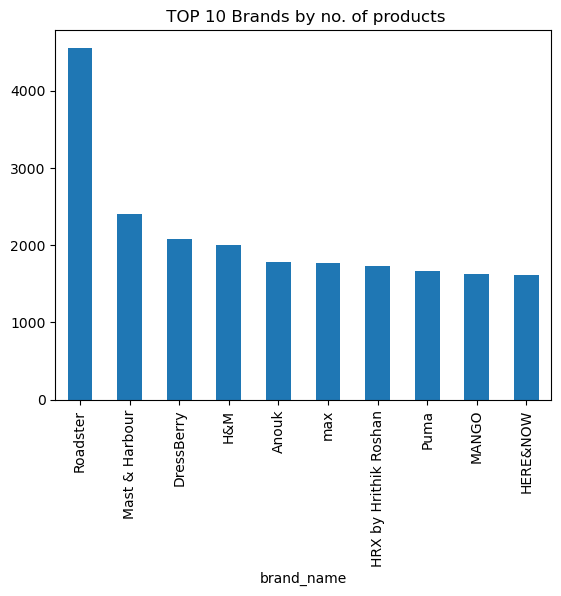

In [26]:
df.groupby('brand_name').size().sort_values(ascending = False).head(10).plot(kind = 'bar', title = ' TOP 10 Brands by no. of products')


### 6. List top 5 brands with maxiumum average rating of products? (2 marks)
Neglect the products which are not reviewed by any person

In [27]:
df[df['rating_count'] != 0.0].groupby('brand_name').mean()['rating'].sort_values(ascending = False).head()

C:\Users\RAJ\AppData\Local\Temp\ipykernel_18036\2832833454.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['rating_count'] != 0.0].groupby('brand_name').mean()['rating'].sort_values(ascending = False).head()


brand_name
1 Stop Fashion          5.0
Heel & Buckle London    5.0
Cetaphil                5.0
Joseph Joseph           5.0
Jove                    5.0
Name: rating, dtype: float64

### 7. Plot a histogram of the distribution of ratings of following brand. (3 marks)
- H&M
- max
- Puma
- MANGO

Neglect the products which are not reviewed by any person

<Axes: xlabel='rating', ylabel='Count'>

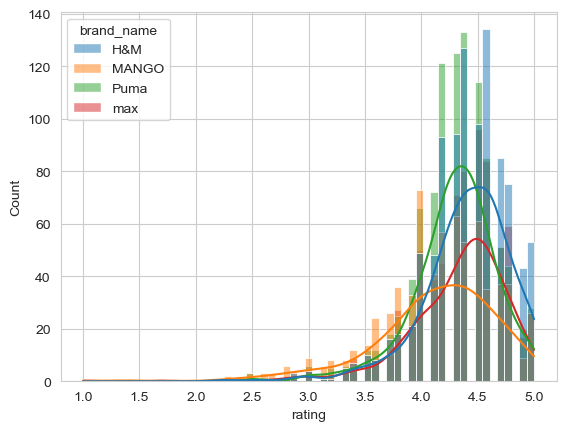

In [31]:
brands = ['H&M', 'max', 'Puma', 'MANGO']
ratings_df = df[['brand_name', 'rating','rating_count']]
ratings_df = ratings_df[ratings_df['brand_name'].isin(brands)]

ratings_df = ratings_df[ratings_df['rating_count'] != 0]

sns.set_style('whitegrid')

sns.histplot(data = ratings_df, x = "rating", kde = True, hue = 'brand_name',label = "DISTRIBUTION OF RATINGS")

### 8. What is the distribution of discounts by brand for specific brands mentioned below? (2 marks)

- H&M
- max
- Puma
- MANGO

Neglect the products which are not reviewed by any person.
Neglect the products which are not on any discount.

<Axes: xlabel='discount_percent', ylabel='Count'>

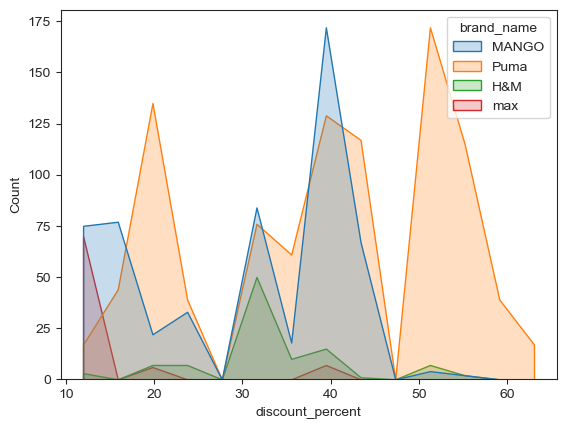

In [37]:
brands = ['H&M', 'max', 'Puma', 'MANGO']
ratings_df = df[['brand_name', 'discount_percent', 'rating_count']]
ratings_df = ratings_df[ratings_df['brand_name'].isin(brands)]

ratings_df = ratings_df[ratings_df['rating_count'] != 0]
ratings_df = ratings_df[ratings_df['discount_percent'] != 0]

sns.set_style("ticks",{"xtick.major.size":8, "ytick.major.size":8})

sns.histplot(data = ratings_df, x = "discount_percent", element = "poly", hue = 'brand_name', color = 'skyblue')

### 9. Is there any trend or pattern you can find between discount percent and rating of the product? (3 marks)

C:\Users\RAJ\AppData\Local\Temp\ipykernel_18036\4198759497.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df.groupby('discount_percent').mean()['rating'], markers=True, alpha = .8, linestyle = 'dashed',


<Axes: xlabel='discount_percent', ylabel='rating'>

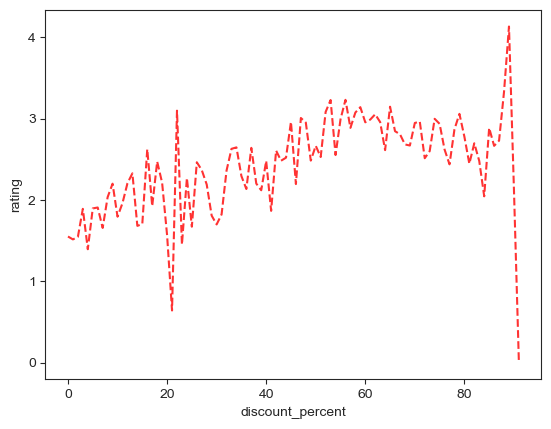

In [49]:
sns.lineplot(data = df.groupby('discount_percent').mean()['rating'], markers=True, alpha = .8, linestyle = 'dashed',
             color = 'red', linewidth = 1.5)

### 10. What are the top 10 most popular tags in the dataset? (2 marks)

<Axes: title={'center': ' POPULAR TAGS'}, xlabel='product_tag'>

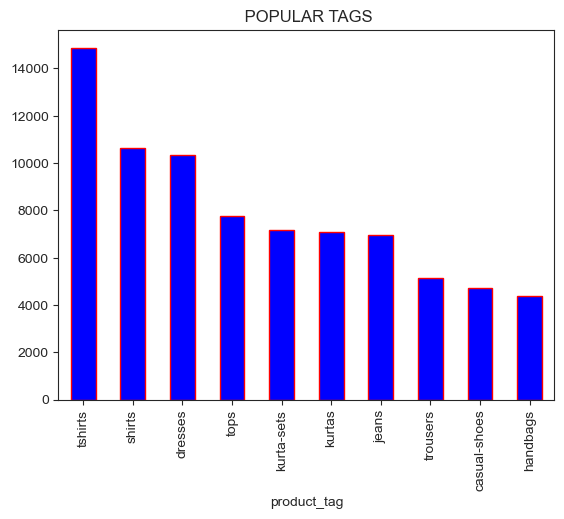

In [54]:
df.groupby('product_tag').size().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                              color = 'blue',
                                                                              edgecolor = 'red',
                                                                              alpha = 1 ,
                                                                             title = ' POPULAR TAGS')

### 11. Are there any relations between the rating and number of people who rated the products? (4 marks)
- Neglect the products that are not reviewed by any person
- Neglect the products that are having zero rating

<Axes: xlabel='rating_count', ylabel='rating'>

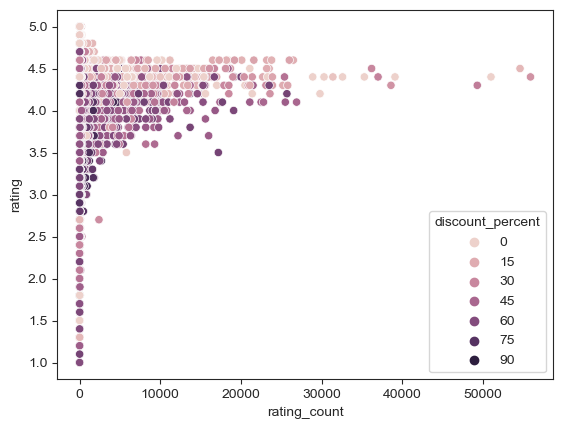

In [63]:
df_pr = df[df['rating'] != 0]
df_pr = df_pr[df_pr['rating_count'] != 0]

sns.scatterplot(x="rating_count", y="rating", data = df_pr, hue = 'discount_percent')

In [65]:
print(df.corr()) 
  

                    rating  rating_count  marked_price  discounted_price  \
rating            1.000000      0.137827     -0.098712         -0.176389   
rating_count      0.137827      1.000000     -0.056568         -0.057249   
marked_price     -0.098712     -0.056568      1.000000          0.869534   
discounted_price -0.176389     -0.057249      0.869534          1.000000   
discount_amount   0.068310     -0.026233      0.676288          0.224251   
discount_percent  0.263483      0.016018      0.089906         -0.277479   
product_id       -0.507066     -0.248513      0.007684          0.051148   

                  discount_amount  discount_percent  product_id  
rating                   0.068310          0.263483   -0.507066  
rating_count            -0.026233          0.016018   -0.248513  
marked_price             0.676288          0.089906    0.007684  
discounted_price         0.224251         -0.277479    0.051148  
discount_amount          1.000000          0.591281   -0.0611

C:\Users\RAJ\AppData\Local\Temp\ipykernel_18036\2708593294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


C:\Users\RAJ\AppData\Local\Temp\ipykernel_18036\244558523.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


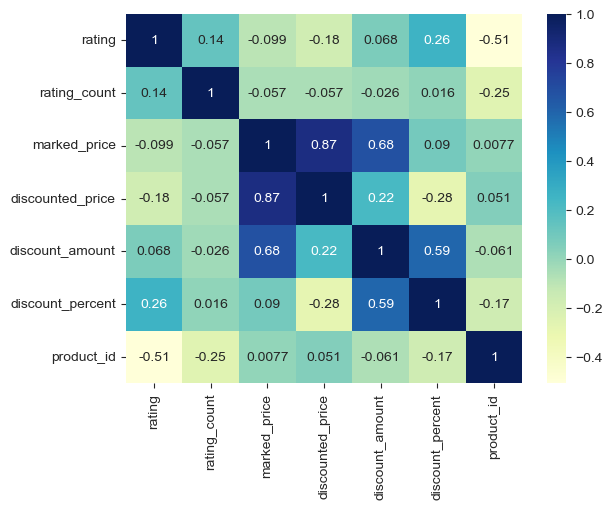

In [68]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 


### 12. What are the top 10 Most Expensive brands? (3 marks)
- Use marked price as the reference to find the most expensive brand

C:\Users\RAJ\AppData\Local\Temp\ipykernel_18036\3173936368.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('brand_name').mean()['marked_price'].sort_values(ascending = False).head(10).plot(kind = 'bar',


<Axes: title={'center': 'TOP 10 most expensive brands'}, xlabel='brand_name'>

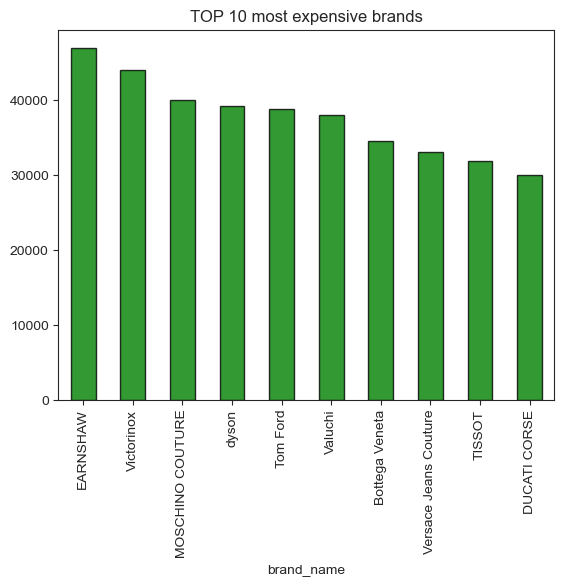

In [75]:
df.groupby('brand_name').mean()['marked_price'].sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                              color = 'green', title= "TOP 10 most expensive brands",
                                                                              edgecolor = 'black',
                                                                              alpha = .8)

### 13. What are the top 10 Most Expensive Product Category? (4 marks)
- Use marked price as the reference to find the most expensive brand

C:\Users\RAJ\AppData\Local\Temp\ipykernel_18036\4254859015.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('product_tag').mean()['marked_price'].sort_values(ascending = False).head(10).plot(kind = 'bar',


<Axes: xlabel='product_tag'>

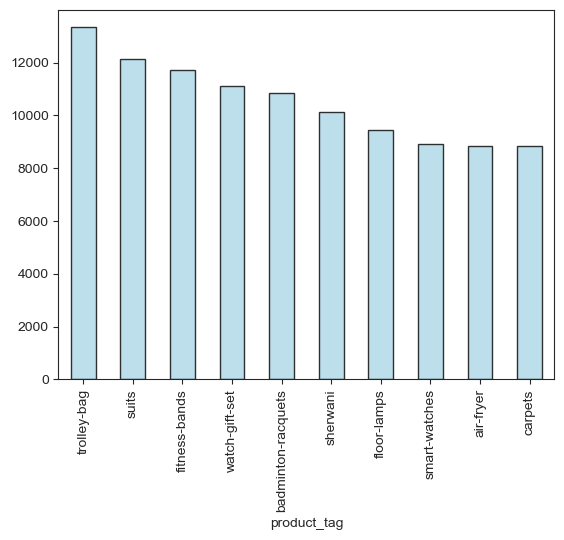

In [76]:
df.groupby('product_tag').mean()['marked_price'].sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                              color = 'lightblue',
                                                                              edgecolor = 'black',
                                                                              alpha = .8)

### 14. Analyse the Violen Plot of watches of following brands mentioned below ? (5 marks)

 - Take Marked Price for Reference
 - Take product_tag as watches
 - Take brand_tag as tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot
 - Make sure to write your inference based on the violen plot of following watch brands price

<Axes: xlabel='marked_price', ylabel='brand_tag'>

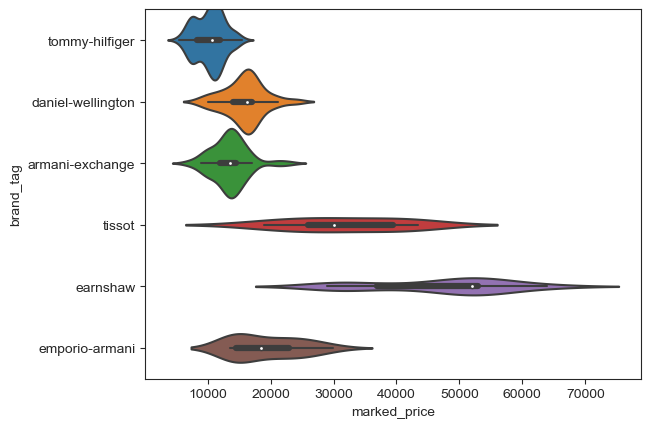

In [85]:
df_pr = df[['product_tag','marked_price','brand_tag']]
df_pr = df_pr[df_pr['product_tag'].isin(['watches'])]
df_pr = df_pr[df_pr['brand_tag'].isin([ 'tommy-hilfiger', 'daniel-wellington', 'armani-exchange', 'emporio-armani',
                                       'earnshaw' , 'tissot'])]

sns.violinplot(data = df_pr, x = "marked_price", y="brand_tag", width = 1.3 )

### 15. List top 5 brands which are having most wide range or products
- Use marked price as the reference

In [87]:
groups = df.groupby('brand_tag')

df_pr = groups['marked_price'].agg([np.max, np.min]).reset_index()
df_pr['diff'] = abs(df_pr['amax'] - df_pr['amin'])

top5 = df_pr.sort_values(by = 'diff', ascending = False).head(5)['brand_tag'].values

In [88]:
list(top5)

['ecraftindia', 'ddecor', 'calvin-klein', 'd1-milano', 'masaba']